In [1]:
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [27]:
df = pd.read_csv('datasets/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [131]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [4]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [66]:
x = df.drop(columns=['HeartDisease'])
x.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


In [67]:
y = df.HeartDisease

In [68]:
x.select_dtypes(include=['object']).describe()


,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [69]:
x.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

### Convert Strings to Float 

In [70]:
# sex column : 0  Female & 1 Male
x['Sex'] = x['Sex'].replace(['M','F'],[1,0])
x['ChestPainType'] = x['ChestPainType'].replace(['ATA','NAP','ASY','TA'],[0,1,2,3])
x['RestingECG'] = x['RestingECG'].replace(['Normal','ST','LVH'],[0,1,2])
x['ExerciseAngina'] = x['ExerciseAngina'].replace(['N','Y'],[0,1])
x['ST_Slope'] = x['ST_Slope'].replace(['Down','Flat','Up'],[0,1,2])



In [71]:
x.dtypes

Age                 int64
Sex                 int64
ChestPainType       int64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int64
dtype: object

In [101]:
# KNN Algorithm

from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)
len(X_train) , len(X_test)


(642, 276)

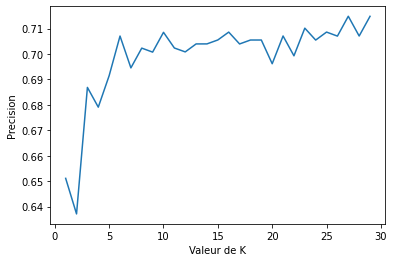

In [102]:
%matplotlib inline
from sklearn.model_selection import cross_val_score
k_range = range(1, 30)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train)
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Valeur de K')
plt.ylabel('Precision')
plt.show()

<AxesSubplot:>

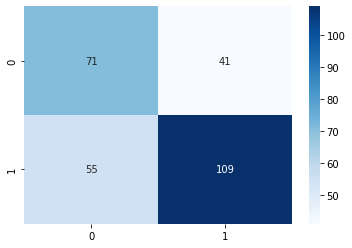

In [103]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
cf_matrix = confusion_matrix(y_test,y_pre)
sns.heatmap(cf_matrix, annot=True,fmt='', cmap='Blues')

In [117]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz 

In [130]:
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)
y_tree_predict = d_tree.predict(X_test)
accuracy_score(y_test,y_tree_predict)


0.7789855072463768